import  Library

In [1]:
# Model 
from sklearn.svm import SVC
# Preprocessing Data 
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn import metrics
import random
# Visualizer 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# save
import pickle as pkl

membuat variabel dan memasukkan data ke variabel lalu memanggilnya

In [2]:
dffruit = pd.read_excel('fruit.xlsx')
dffruit

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit


untuk mengetahui info dari tabel (berapa kolom,berapa banyak data tiap kolom ,type data)

In [3]:
dffruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


untuk mengetahui min,max,mean

In [4]:
dffruit.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


mengetahui jumlah label dan  apa aja labelnya + type data


In [5]:
pd.unique(dffruit['name'])

array(['orange', 'grapefruit'], dtype=object)

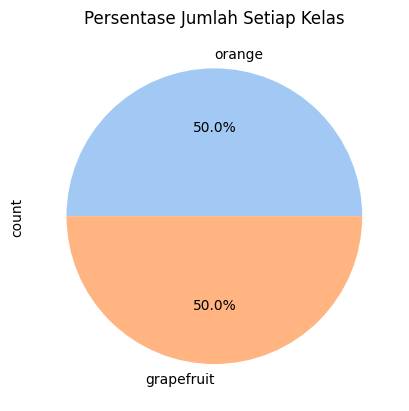

In [6]:
sns.set_palette('pastel')
dffruit['name'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Persentase Jumlah Setiap Kelas")
plt.show()

mengetahui jumlah data yang dari setiap label

In [7]:
dffruit['name'].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

split dependent (target/label) independent (atribut) variable (memisahkan antara kolom dependent dan independent)

In [8]:
x = dffruit.iloc[:,0:5].values
y = dffruit.iloc[:,[5]].values

feature Encoder

In [9]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

c:\Users\ypray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


feature scaling

In [10]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

membagi data untuk test dan traning

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# Menampilkan dimensi data
print("Dimensi x_train:", x_train.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi x_test:", x_test.shape)
print("Dimensi y_test:", y_test.shape)

Dimensi x_train: (8000, 5)
Dimensi y_train: (8000,)
Dimensi x_test: (2000, 5)
Dimensi y_test: (2000,)


traning / fit model


In [12]:
def fitnes(y_true, x, p): 
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    models = SVC(kernel=kernels[int(p[0])], gamma=p[1], C=p[2]).fit(x, y_true)
    y_pred = models.predict(x)
    loss = metrics.mean_squared_error(y_true, y_pred)
    acc = metrics.accuracy_score(y_true, y_pred)
    return loss, acc

# Spawn populasi
def spwan_pop(): 
    return np.array([np.random.randint(0, 4), np.abs(np.random.randn()), np.abs(np.random.random())])

# Iterasi dan parameter tuning
ite = 100
params = []
loss = []
accs = []
gammas = []
cs = []

for i in tqdm(range(ite) , 'Fine Tuning...') : 
    pop = spwan_pop()
    fitnesh , acc = fitnes(y_train , x_train, pop)
    params.append(pop)
    loss.append(fitnesh)
    accs.append(acc)
    gammas.append(pop[1])
    cs.append(pop[2])       
# Ambil parameter terbaik
best = params[np.argmin(loss)]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# Latih model terbaik
modelsh = SVC(kernel=kernels[int(best[0])], gamma=best[1], C=best[2]).fit(x_train, y_train)
# save model
try:
    with open('svm_fruit.pkl', 'wb') as f:
        pkl.dump(modelsh, f)
    print("Model berhasil disimpan.")
except Exception as e:
    print(f"Terjadi kesalahan saat menyimpan: {e}")

Fine Tuning...: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Model berhasil disimpan.


In [13]:
with open('scaler_fruit_SVM.pkl', 'wb') as scaler_file:
    pkl.dump(scaler, scaler_file)
with open('label_encoder_fruit_SVM.pkl', 'wb') as encoder_file:
    pkl.dump(encoder, encoder_file)

Accuration Check, Classification Report, and Visual Confusion Matrix

Kernel terbaik : poly | gamma = 2.150836559567547 | C = 0.7631817118505267
Loss = 0.052375 | Skor akurasi = 0.947625 atau 94.76%


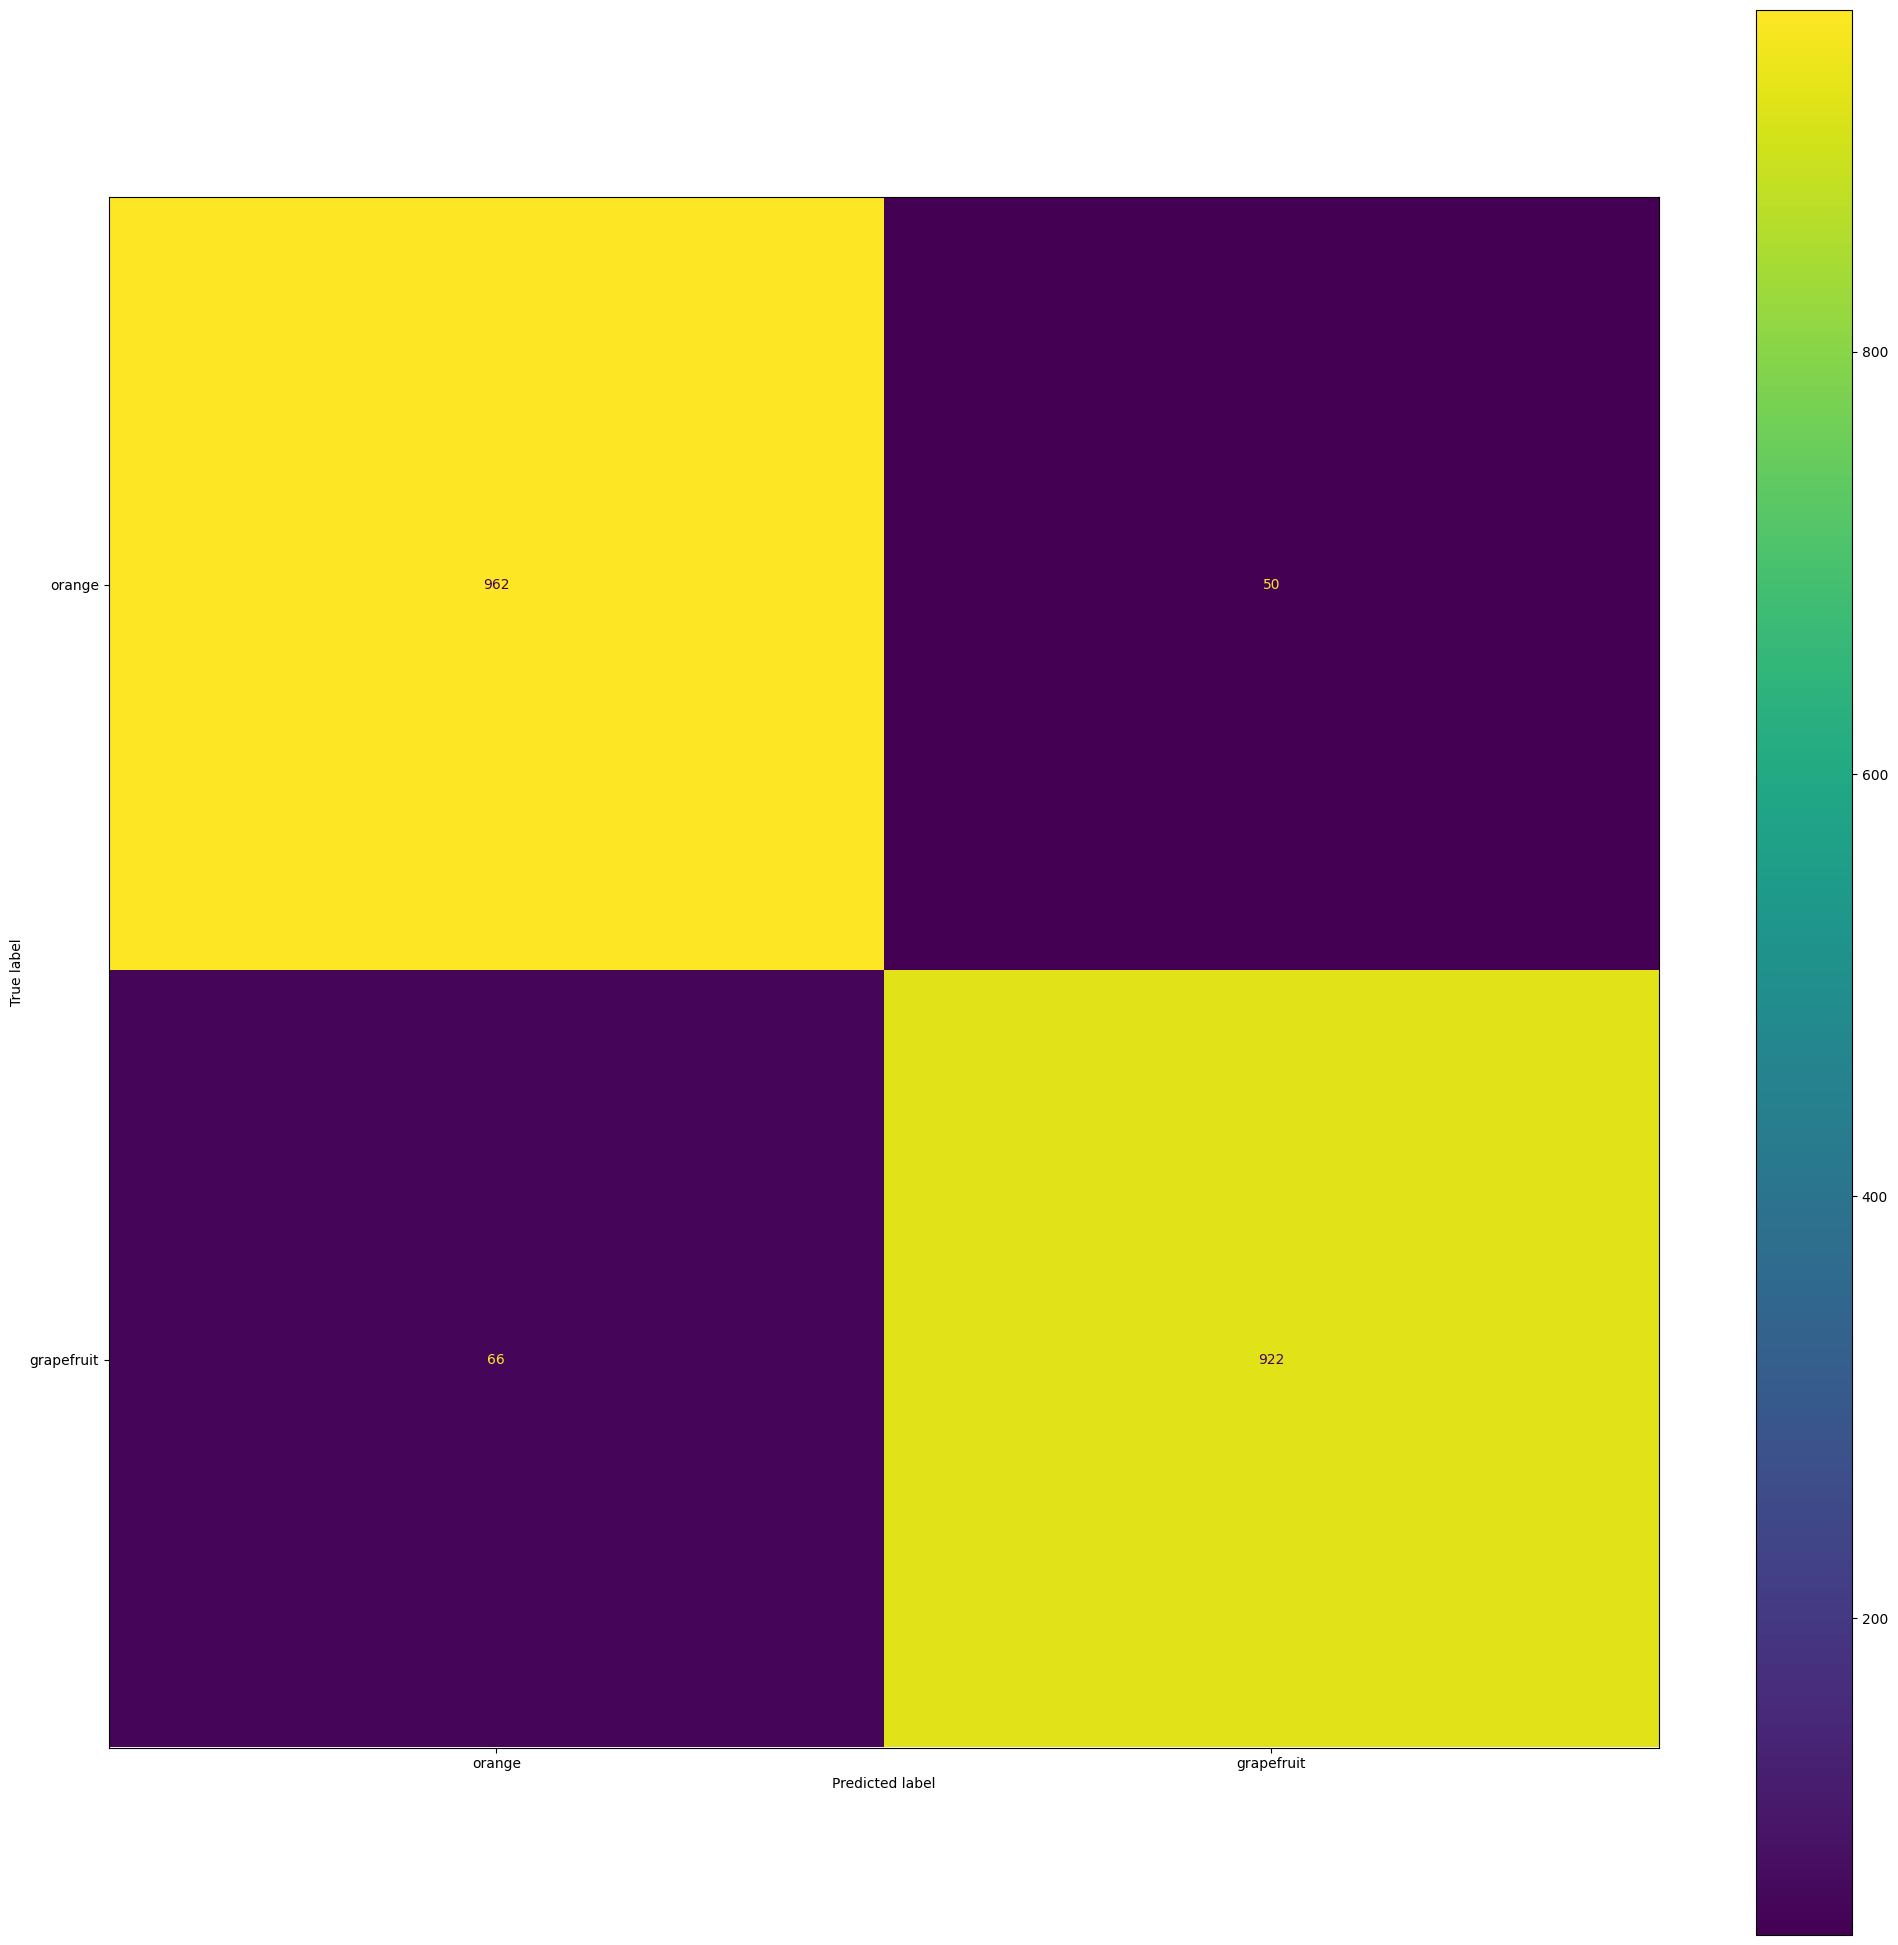

In [14]:
# Prediksi data uji
y_prediction = modelsh.predict(x_test)
# Hitung akurasi pada data uji
acc = metrics.accuracy_score(y_test, y_prediction)
print(f'Kernel terbaik : {kernels[int(best[0])]} | gamma = {best[1]} | C = {best[2]}')
print(f'Loss = {np.min(loss)} | Skor akurasi = {np.max(accs)} atau {np.max(accs)*100:.2f}%')
# Visualisasi matriks kebingungan
labels = ['orange', 'grapefruit']
fig, ax = plt.subplots(figsize=(25, 25))  
ConfusionMatrixDisplay(confusion_matrix(y_test, y_prediction), display_labels=labels).plot(ax=ax)



In [15]:
y_prediction

array([0, 1, 1, ..., 0, 1, 0])

[[-0.75244734  0.15819476]
 [-0.66241811  0.14906684]
 [-0.6111472   0.10768528]
 ...
 [ 0.53672148 -0.11613841]
 [ 0.5907387  -0.28983818]
 [ 0.51871654 -0.45094208]]


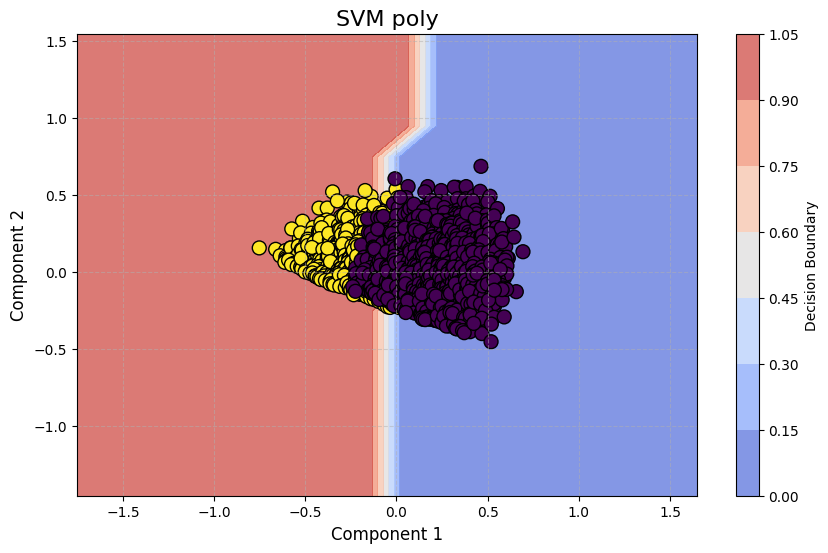

In [16]:
PCAcomponent = PCA(2).fit(x, y)
componen = PCAcomponent.transform(x)
print(componen)
xmin , xmax = componen[:,0].min() - 1, componen[:,0].max() + 1
ymin , ymax = componen[:,1].min() - 1, componen[:,1].max() + 1
xx,yy = np.meshgrid(
    np.arange(xmin , xmax , 0.2) , np.arange(ymin , ymax , 0.2) 
)
loadM = SVC(kernel=kernels[int(best[0])] , gamma=best[1] , C=best[2]).fit(componen, y)
z = loadM.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
# plt.title(f"SVM {kernels[int(best[0])]}")
# plt.contourf(xx, yy ,z , alpha = 0.7)
# plt.scatter(x=componen[:,0] , y=componen[:,1] , c=y)
# plt.show()
plt.figure(figsize=(10, 6))  # Memperbesar ukuran gambar
plt.title(f"SVM {kernels[int(best[0])]}", fontsize=16)
contour = plt.contourf(xx, yy, z, alpha=0.7, cmap='coolwarm')  # Warna lebih kontras
plt.colorbar(contour, label="Decision Boundary")  # Menambahkan color bar
scatter = plt.scatter(x=componen[:, 0], y=componen[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel("Component 1", fontsize=12)
plt.ylabel("Component 2", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # Menambahkan grid untuk referensi
plt.show()


In [17]:
def test_new_dffruit(new_dffruit):
    # Skala dffruit baru
    new_dffruit_scaled = scaler.transform(new_dffruit)
    # Prediksi menggunakan model
    predictions = modelsh.predict(new_dffruit_scaled)
    # Dekode prediksi menjadi label asli
    predictions_decoded = encoder.inverse_transform(predictions)
    return predictions_decoded

# Contoh dffruit baru untuk diuji
new_dffruit = pd.DataFrame({
    'diameter': [5.5, 6.3],
    'weight': [120, 150],
    'red': [200, 180],
    'green': [50, 60],
    'blue': [30, 40]
})

print("Prediksi untuk dffruit baru:")
try:
    predictions = test_new_dffruit(new_dffruit)
    print(predictions)
except ValueError as e:
    print(f"Error: {e}")

Prediksi untuk dffruit baru:
['orange' 'orange']


c:\Users\ypray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
